In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

In [8]:
add = pd.read_excel('Admission.xlsx')
add.head()

,SlNo,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Entrance_Test,Percentile_ET,Percent_MBA,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Salary
0,1,M,62.00,Others,88.00,Others,Commerce,52.00,Science,0,MAT,55.0,58.80,Marketing & HR,50,65,74,Placed,270000
1,2,M,76.33,ICSE,75.33,Others,Science,75.48,Computer Applications,1,MAT,86.5,66.28,Marketing & Finance,69,70,75,Placed,200000
2,3,M,72.00,Others,78.00,Others,Commerce,66.63,Engineering,0,NaN,0.0,52.91,Marketing & Finance,50,61,59,Placed,240000
3,4,M,60.00,CBSE,63.00,CBSE,Arts,58.00,Management,0,MAT,75.0,57.80,Marketing & Finance,54,66,62,Placed,250000
4,5,M,61.00,CBSE,55.00,ISC,Science,54.00,Engineering,1,MAT,66.0,59.43,Marketing & HR,52,65,67,Placed,180000


In [10]:
add.shape

(391, 19)

In [12]:
add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 19 columns):
SlNo                   391 non-null int64
Gender                 391 non-null object
Percent_SSC            391 non-null float64
Board_SSC              391 non-null object
Percent_HSC            391 non-null float64
Board_HSC              391 non-null object
Stream_HSC             391 non-null object
Percent_Degree         391 non-null float64
Course_Degree          391 non-null object
Experience_Yrs         391 non-null int64
Entrance_Test          324 non-null object
Percentile_ET          391 non-null float64
Percent_MBA            391 non-null float64
Specialization_MBA     391 non-null object
Marks_Communication    391 non-null int64
Marks_Projectwork      391 non-null int64
Marks_BOCA             391 non-null int64
Placement              391 non-null object
Salary                 391 non-null int64
dtypes: float64(5), int64(6), object(8)
memory usage: 58.1+ KB


In [19]:
cat_cols = list(add.select_dtypes(include = 'object'))
cat_cols

['Gender',
 'Board_SSC',
 'Board_HSC',
 'Stream_HSC',
 'Course_Degree',
 'Entrance_Test',
 'Specialization_MBA',
 'Placement']

In [22]:
num_cols = list(add.select_dtypes(exclude = 'object'))
num_cols.remove('SlNo')
num_cols

['Percent_SSC',
 'Percent_HSC',
 'Percent_Degree',
 'Experience_Yrs',
 'Percentile_ET',
 'Percent_MBA',
 'Marks_Communication',
 'Marks_Projectwork',
 'Marks_BOCA',
 'Salary']

In [23]:
add[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Percent_SSC,391.0,64.652353,10.960426,37.00,56.000,64.50,74.00,87.20
Percent_HSC,391.0,63.795294,11.417726,40.00,54.000,63.00,72.00,94.70
Percent_Degree,391.0,62.983606,8.916152,35.00,57.525,63.00,69.00,89.00
Experience_Yrs,391.0,0.478261,0.667112,0.00,0.000,0.00,1.00,3.00
Percentile_ET,391.0,54.934962,31.168264,0.00,41.190,62.00,78.00,98.69
Percent_MBA,391.0,61.667698,5.854399,50.83,57.195,61.01,66.02,77.89
Marks_Communication,391.0,60.539642,8.824084,50.00,53.000,58.00,67.00,88.00
Marks_Projectwork,391.0,68.363171,7.145095,50.00,64.000,69.00,74.00,87.00
Marks_BOCA,391.0,64.378517,9.582834,50.00,57.000,63.00,72.50,96.00
Salary,391.0,219078.260870,138311.647036,0.00,172800.000,240000.00,300000.00,940000.00


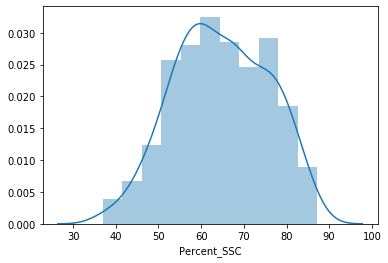

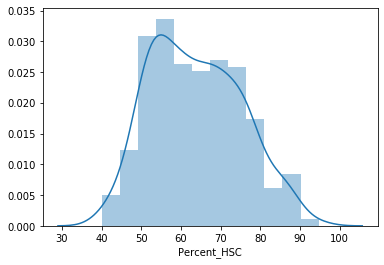

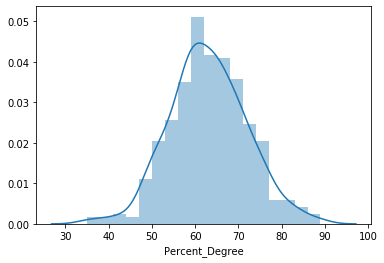

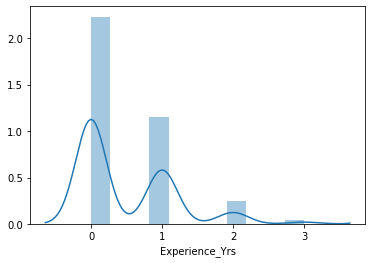

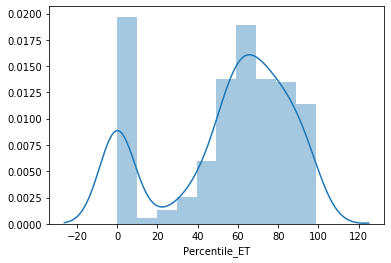

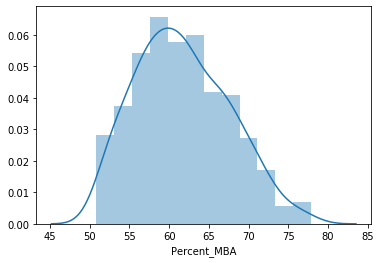

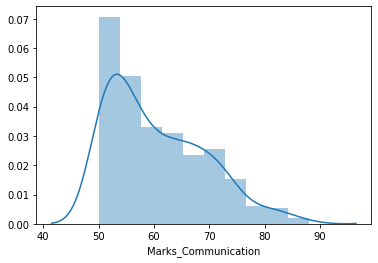

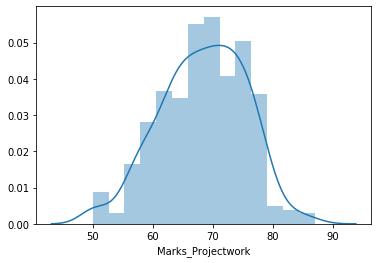

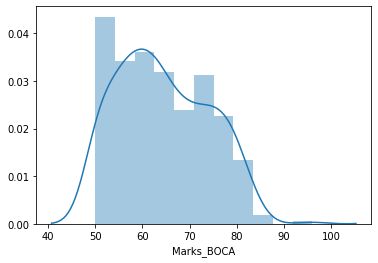

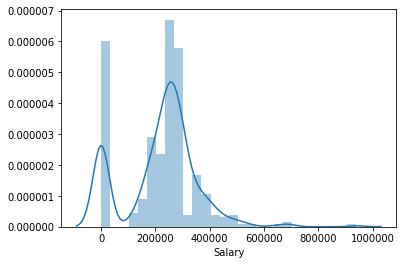

In [24]:
for i in num_cols:
    sns.distplot(add[i])
    plt.show()

In [25]:
add['Salary'][add['Salary']==0].count()

79

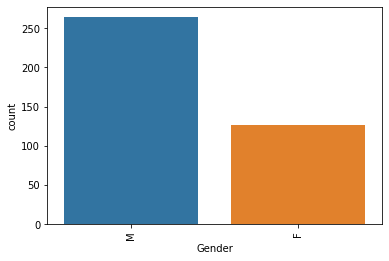

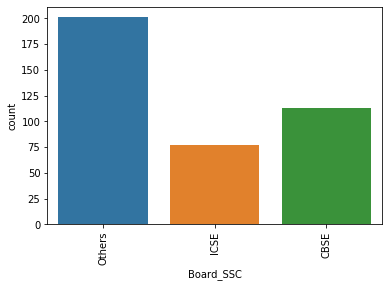

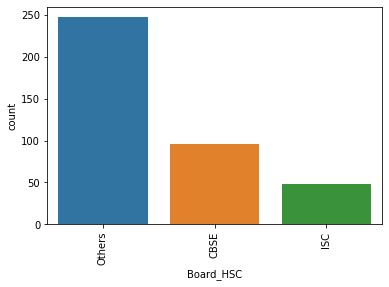

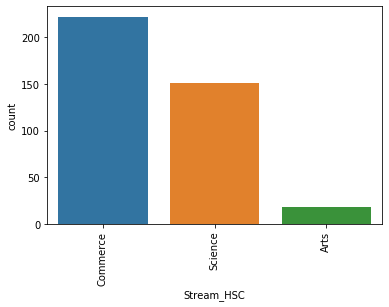

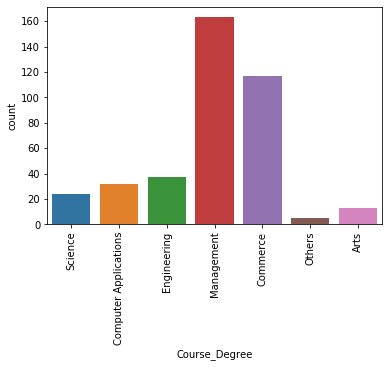

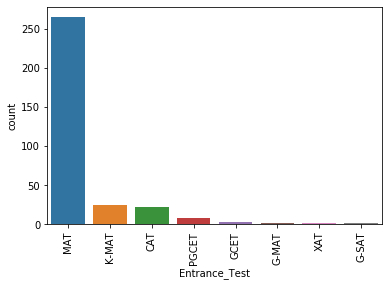

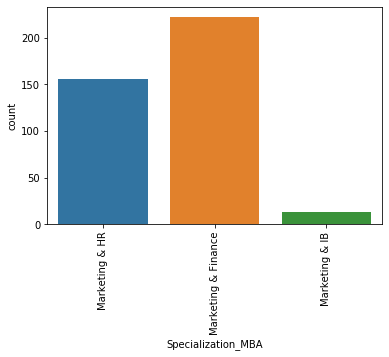

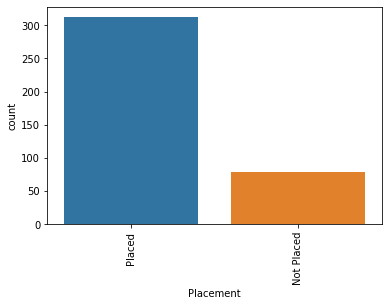

In [27]:
for i in cat_cols:
    sns.countplot(add[i])
    plt.xticks(rotation = 90)
    plt.show()

Inference:
    1. there ate 79 people with 0 salary, they seem to be the ones who do not have jobs.
    2. Marks BOCA, Projectwork and Percentage in MBA is minimum 50%.
    3. Only 25% people have experience ranging from 1 to 3.
    4. Previous schooling percentage is fairly normally distributed.
    5. Most students are from Marketing & Finance background.
    6. These students have got addmission by clearing MAT, Most of them are from Management and commerce backgrounds.
    Least number of studnets are from science and arts background. Consequtively the HSC straem for most of them is Commerce.
    7. More students are from 'Other' types of boards This could be state or private boards. Vary few students are from ICSE and CBSE boards.
    8. The number coming from CBSE and ICSE reduces from SSC to HSC.
    9. The records have more male students than female students.

In [28]:
add.isnull().sum()

SlNo                    0
Gender                  0
Percent_SSC             0
Board_SSC               0
Percent_HSC             0
Board_HSC               0
Stream_HSC              0
Percent_Degree          0
Course_Degree           0
Experience_Yrs          0
Entrance_Test          67
Percentile_ET           0
Percent_MBA             0
Specialization_MBA      0
Marks_Communication     0
Marks_Projectwork       0
Marks_BOCA              0
Placement               0
Salary                  0
dtype: int64

In [29]:
add['Entrance_Test'].value_counts()

MAT      265
K-MAT     24
CAT       22
PGCET      8
GCET       2
G-MAT      1
G-SAT      1
XAT        1
Name: Entrance_Test, dtype: int64

In [30]:
add['Entrance_Test'].fillna('MAT', inplace = True)
add.isnull().sum()

SlNo                   0
Gender                 0
Percent_SSC            0
Board_SSC              0
Percent_HSC            0
Board_HSC              0
Stream_HSC             0
Percent_Degree         0
Course_Degree          0
Experience_Yrs         0
Entrance_Test          0
Percentile_ET          0
Percent_MBA            0
Specialization_MBA     0
Marks_Communication    0
Marks_Projectwork      0
Marks_BOCA             0
Placement              0
Salary                 0
dtype: int64

The null value in enctrance exam has been tretaed. Now looking at teh outliers, When we looked at the distplots above in univariate analysis, We see only salary having right skewed data.

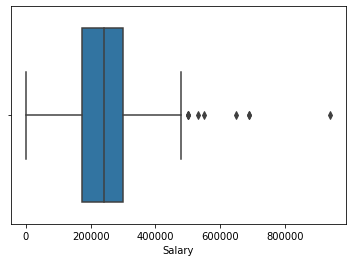

In [31]:
sns.boxplot(add['Salary'])

We see that beyond 50K there are few ouliers going uptill 90k.

In [32]:
add['Salary'].skew()

0.24057521026137152

In [34]:
import scipy.stats as stats
_, pval = stats.shapiro(add['Salary'])
pval>0.05

False

The data is definetly not normal. However its ideal to treat skewness which is over 1, here the skewness is only 0.24.
Also We should avoid transfromations in the target column in order to prdeict accurate results.

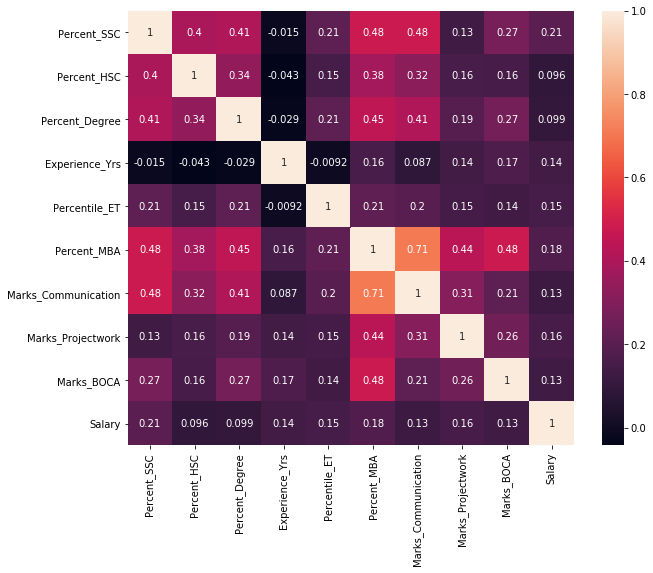

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(add[num_cols].corr(), annot = True)

None of the numerical variables have a strong correlation with Salary. 
Percent MBA on teh other hand is strongly correlated with Marks in Communication. ALso milk collrelation with Marks BOCA and projectwork.
We will not drop any columns based on the correlation score.

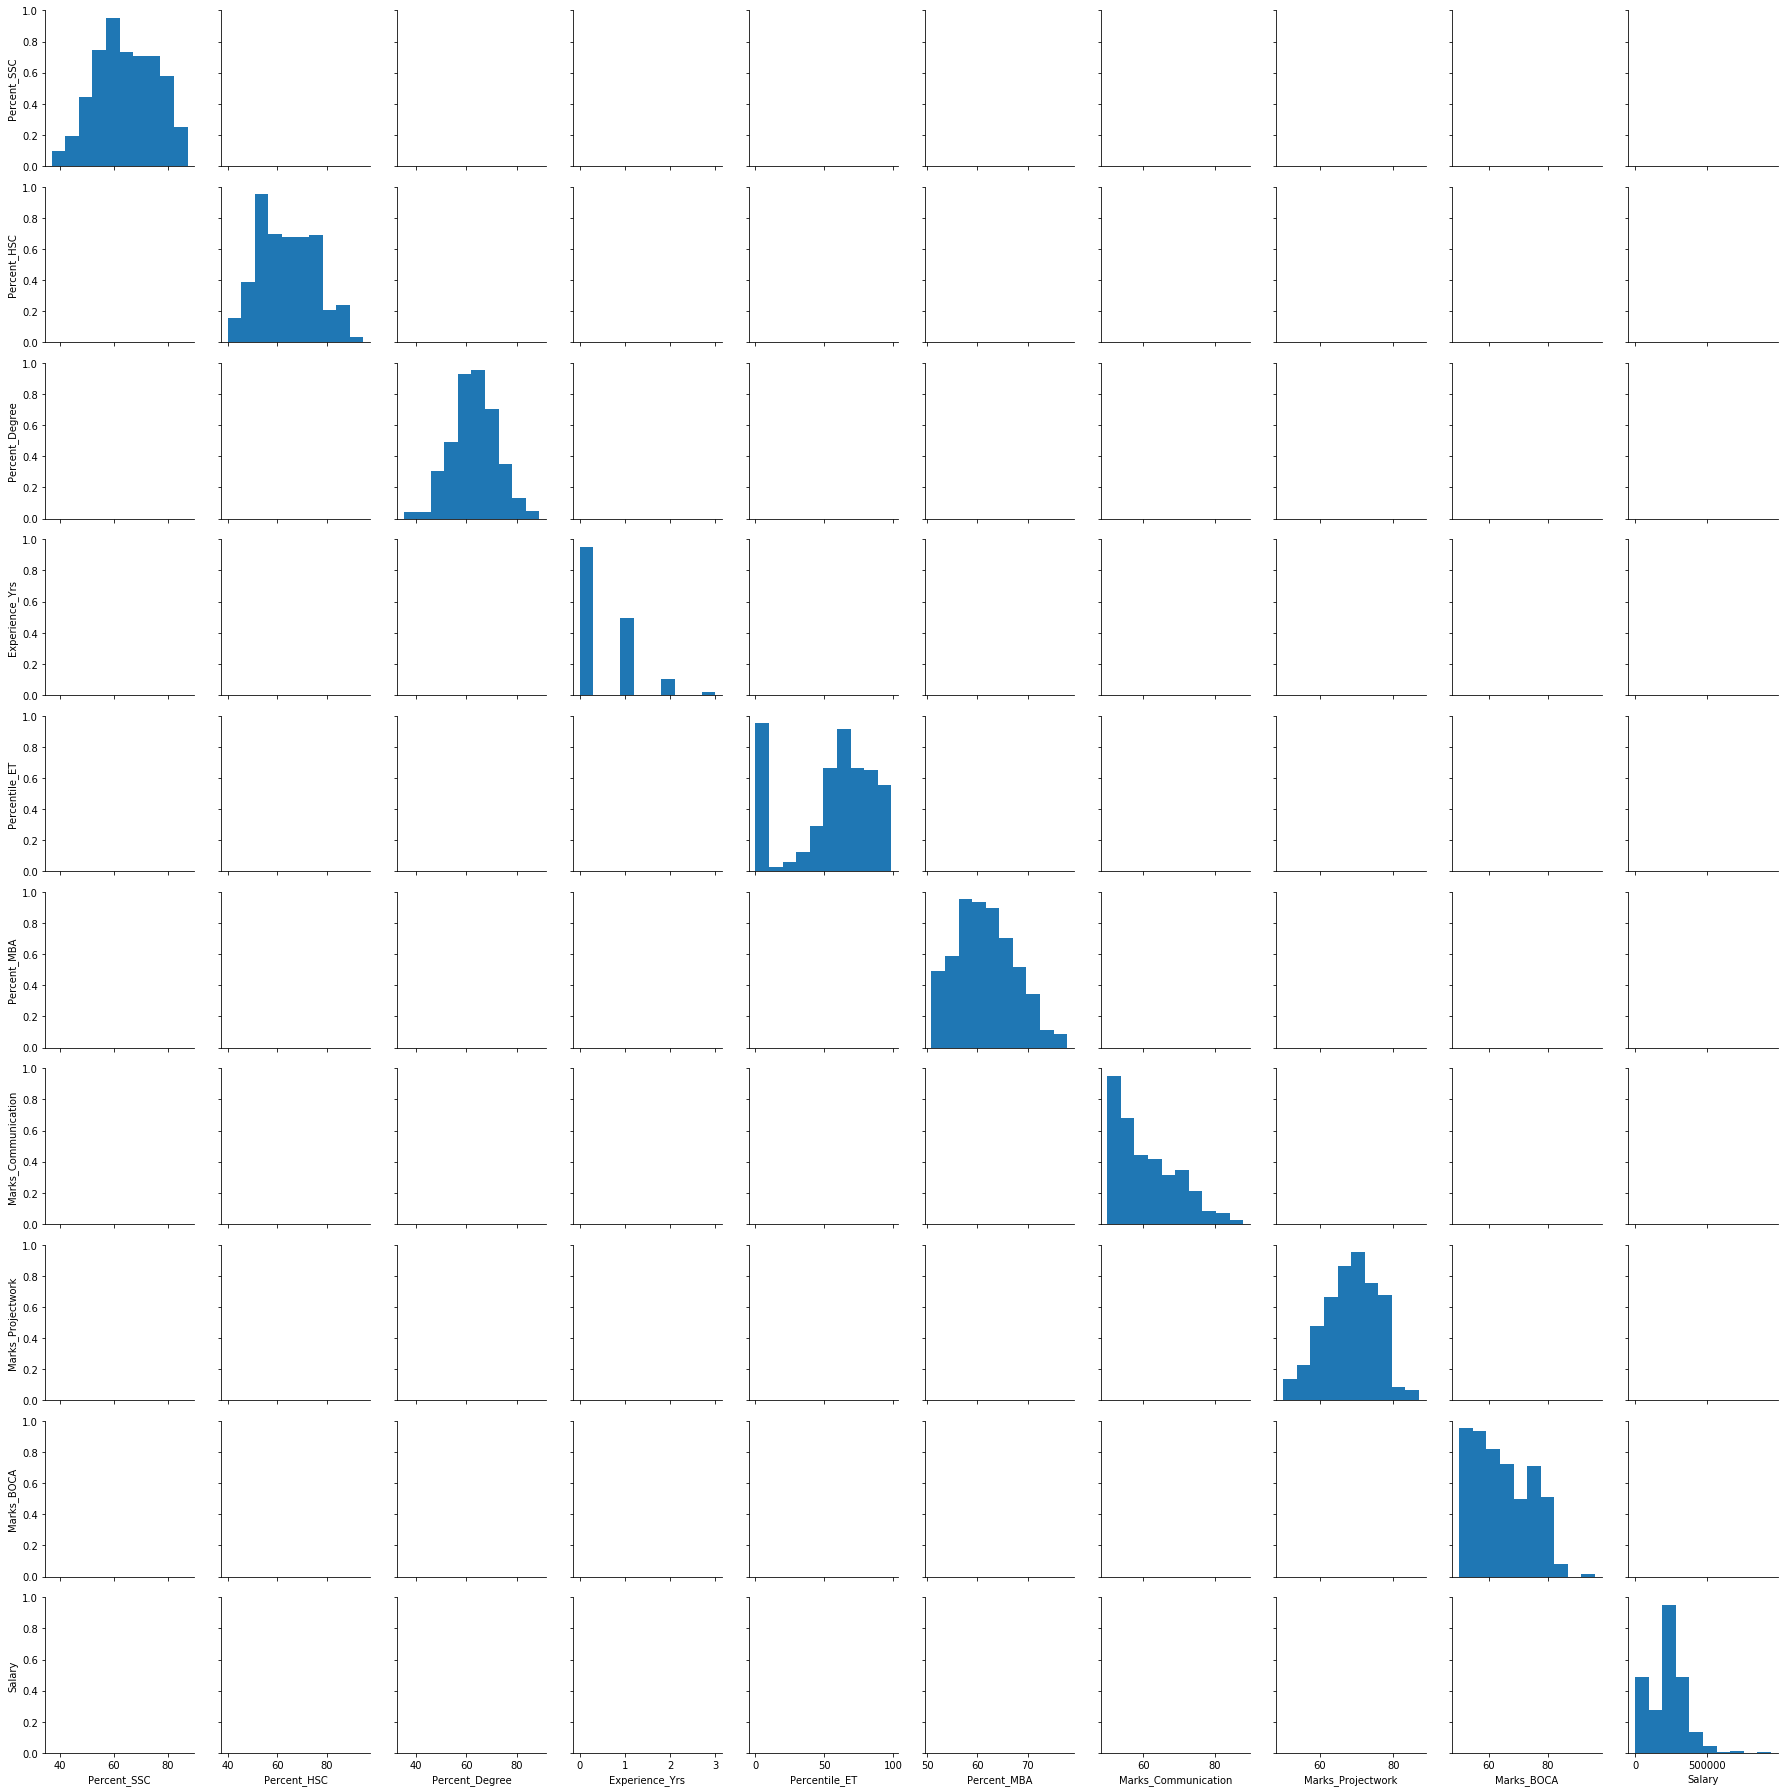

In [40]:
sns.pairplot(add[num_cols], kind = 'kde')

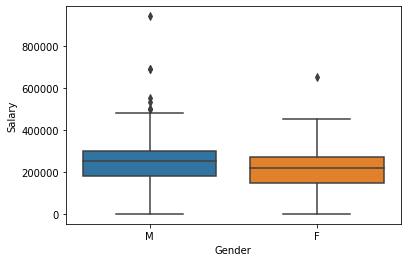

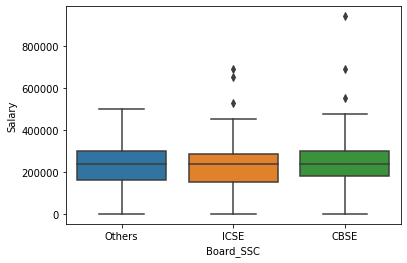

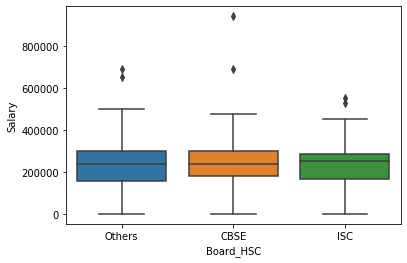

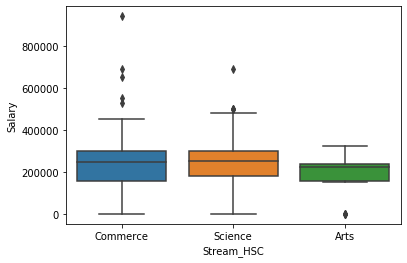

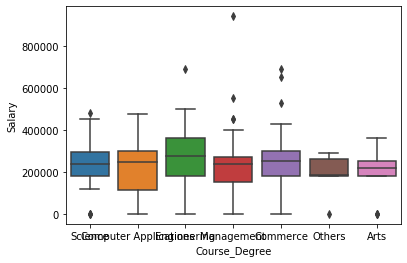

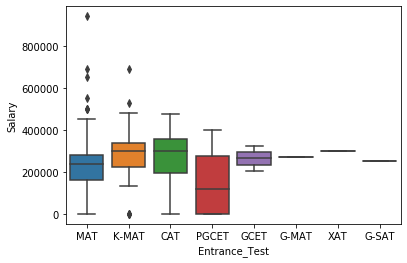

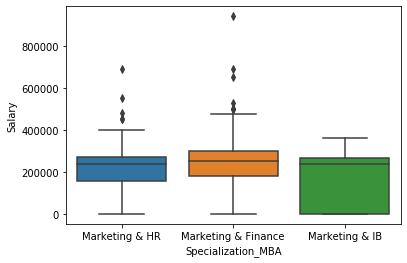

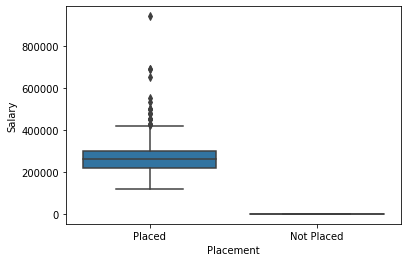

In [43]:
for i in cat_cols:
    sns.boxplot(add[i], add['Salary'])
    plt.show()

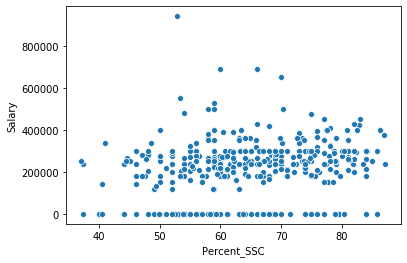

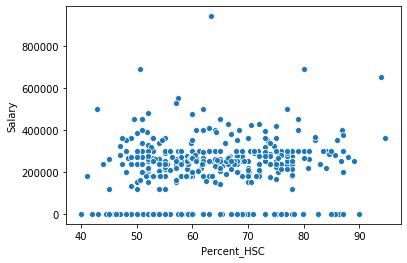

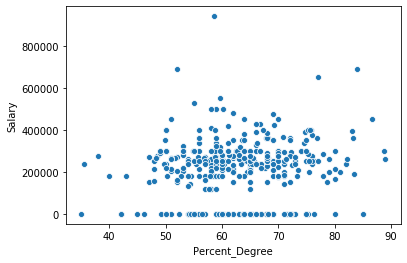

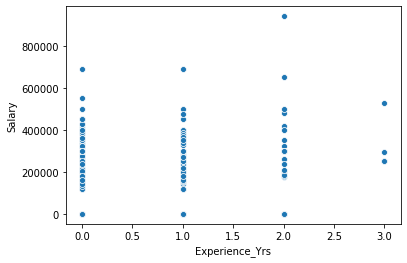

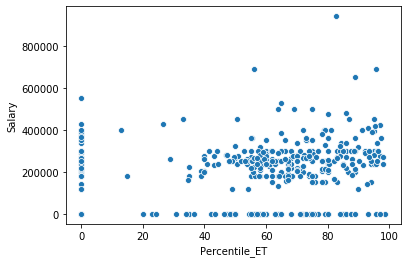

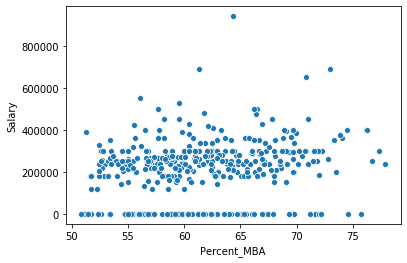

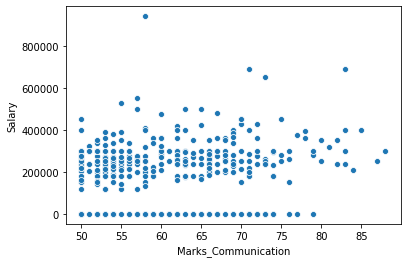

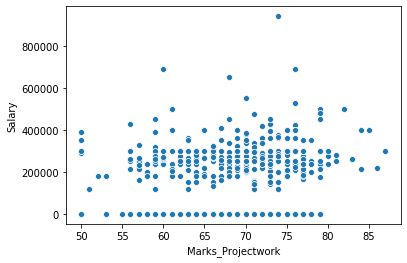

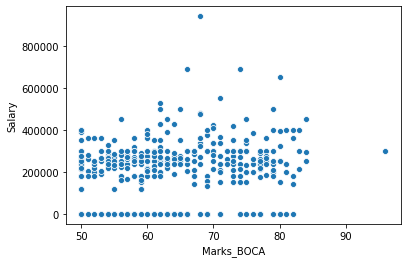

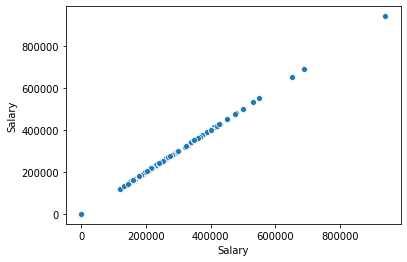

In [44]:
for i in num_cols:
    sns.scatterplot(add[i], add['Salary'])
    plt.show()

Obs:
    1. Maximum salaries being drawn by students from the Marketing Finance & Marketing branch, most of these students had taken 
    ipcommerce in their degree college.
    2. Theere are some outliers in the people who had cleared MAT exam however CAT hold a higher means along with K-Mat.
    3. The mean of salary is at par with teh course that the students had during their degree.
    4. The mean of previous education and gender has no impact on the avg salary.
    5. None of the numerical variables follow a linear relationship with salary.
    

We will perfrom statistical tests to check which variables to keep and remove

In [47]:
#For all num cols, we will go with pearson test
for i in num_cols:
    print(i)
    _, pval = stats.pearsonr(add[i], add['Salary'])
    print(pval)
    print(pval>0.05, '\n')
        

Percent_SSC
4.37316389841695e-05
False 

Percent_HSC
0.05842912892559625
True 

Percent_Degree
0.0515636539087517
True 

Experience_Yrs
0.004741422630380914
False 

Percentile_ET
0.0028337275293176464
False 

Percent_MBA
0.0004508838976044077
False 

Marks_Communication
0.011257968686960941
False 

Marks_Projectwork
0.0020940166017263014
False 

Marks_BOCA
0.007921241383429941
False 

Salary
0.0
False 



In [77]:
s_variables = ['Percent_SSC',
 'Experience_Yrs',
 'Percentile_ET',
 'Percent_MBA',
 'Marks_Communication',
 'Marks_Projectwork',
 'Marks_BOCA',
 'Salary']
s_variables

['Percent_SSC',
 'Experience_Yrs',
 'Percentile_ET',
 'Percent_MBA',
 'Marks_Communication',
 'Marks_Projectwork',
 'Marks_BOCA',
 'Salary']

In [51]:
for i in cat_cols:
    print(i)
    print(add[i].value_counts(), '\n')

Gender
M    264
F    127
Name: Gender, dtype: int64 

Board_SSC
Others    201
CBSE      113
ICSE       77
Name: Board_SSC, dtype: int64 

Board_HSC
Others    247
CBSE       96
ISC        48
Name: Board_HSC, dtype: int64 

Stream_HSC
Commerce    222
Science     151
Arts         18
Name: Stream_HSC, dtype: int64 

Course_Degree
Management               163
Commerce                 117
Engineering               37
Computer Applications     32
Science                   24
Arts                      13
Others                     5
Name: Course_Degree, dtype: int64 

Entrance_Test
MAT      332
K-MAT     24
CAT       22
PGCET      8
GCET       2
G-MAT      1
G-SAT      1
XAT        1
Name: Entrance_Test, dtype: int64 

Specialization_MBA
Marketing & Finance    222
Marketing & HR         156
Marketing & IB          13
Name: Specialization_MBA, dtype: int64 

Placement
Placed        312
Not Placed     79
Name: Placement, dtype: int64 



In [55]:
#Gender
add_m = add[add['Gender']=='M']['Salary']
add_f = add[add['Gender']=='F']['Salary']

_, pval = stats.mannwhitneyu(add_m, add_f)
pval, pval>0.05

(0.0013237576978127575, False)

In [56]:
#Gender
add_p = add[add['Placement']=='Placed']['Salary']
add_np = add[add['Placement']=='Not Placed']['Salary']

_, pval = stats.mannwhitneyu(add_p, add_np)
pval, pval>0.05

(1.1440981438778223e-43, False)

In [78]:
#Both the variables are significant for us. We now check using Anova
s_variables.append('Placement')
s_variables.append('Gender')
#s_variables.remove(['Placement', 'Gender'])
s_variables

['Percent_SSC',
 'Experience_Yrs',
 'Percentile_ET',
 'Percent_MBA',
 'Marks_Communication',
 'Marks_Projectwork',
 'Marks_BOCA',
 'Salary',
 'Placement',
 'Gender']

In [63]:
cat_cols

['Gender',
 'Board_SSC',
 'Board_HSC',
 'Stream_HSC',
 'Course_Degree',
 'Entrance_Test',
 'Specialization_MBA',
 'Placement']

In [64]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("Salary~Gender+Board_SSC+Board_HSC+Stream_HSC+Course_Degree+Entrance_Test+Specialization_MBA+Placement",
           data = add).fit()
anova_tbl = sm.stats.anova_lm(model)
anova_tbl

,df,sum_sq,mean_sq,F,PR(>F)
Gender,1.0,1.251070e+11,1.251070e+11,19.343357,1.432563e-05
Board_SSC,2.0,2.366545e+10,1.183273e+10,1.829511,1.619527e-01
Board_HSC,2.0,5.911416e+08,2.955708e+08,0.045700,9.553344e-01
Stream_HSC,2.0,2.729246e+10,1.364623e+10,2.109905,1.227179e-01
Course_Degree,6.0,1.270248e+11,2.117079e+10,3.273312,3.783073e-03
Entrance_Test,7.0,2.038672e+11,2.912389e+10,4.502975,7.869778e-05
Specialization_MBA,2.0,5.894479e+10,2.947240e+10,4.556859,1.109569e-02
Placement,1.0,4.520605e+12,4.520605e+12,698.951054,5.454759e-87
Residual,367.0,2.373646e+12,6.467699e+09,NaN,NaN


In [65]:
anova_tbl['PR(>F)']>0.05

Gender                False
Board_SSC              True
Board_HSC              True
Stream_HSC             True
Course_Degree         False
Entrance_Test         False
Specialization_MBA    False
Placement             False
Residual              False
Name: PR(>F), dtype: bool

So, we can clearly see that the previous education, board and stream in school and high school doesnt impact the salary

In [79]:
for i in cat_cols:
    s_variables.append(i)

    
s_variables

['Percent_SSC',
 'Experience_Yrs',
 'Percentile_ET',
 'Percent_MBA',
 'Marks_Communication',
 'Marks_Projectwork',
 'Marks_BOCA',
 'Salary',
 'Placement',
 'Gender',
 'Gender',
 'Board_SSC',
 'Board_HSC',
 'Stream_HSC',
 'Course_Degree',
 'Entrance_Test',
 'Specialization_MBA',
 'Placement']

In [83]:


s_variables.remove('Gender')
s_variables.remove('Placement')

In [84]:
s_variables

['Percent_SSC',
 'Experience_Yrs',
 'Percentile_ET',
 'Percent_MBA',
 'Marks_Communication',
 'Marks_Projectwork',
 'Marks_BOCA',
 'Salary',
 'Gender',
 'Course_Degree',
 'Entrance_Test',
 'Specialization_MBA',
 'Placement']

Basis stats model, we have the below variables ready for model building. We will now also shortlist the model also using VIF Scores and backward elimination.

Before we do that, lets first see how the variables are placed linearly

In [98]:
from sklearn.preprocessing import LabelEncoder
LR = LabelEncoder()
add['Gender'] = LR.fit_transform(add['Gender'])
add['Course_Degree'] = LR.fit_transform(add['Course_Degree'])
add['Entrance_Test'] = LR.fit_transform(add['Entrance_Test'])
add['Specialization_MBA'] = LR.fit_transform(add['Specialization_MBA'])
add['Placement'] = LR.fit_transform(add['Placement'])
add['Board_SSC'] = LR.fit_transform(add['Board_SSC'])
add['Board_HSC'] = LR.fit_transform(add['Board_HSC'])
add['Stream_HSC'] = LR.fit_transform(add['Stream_HSC'])
add.head()

,SlNo,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Entrance_Test,Percentile_ET,Percent_MBA,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Salary
0,1,1,62.00,2,88.00,2,1,52.00,6,0,5,55.0,58.80,1,50,65,74,1,270000
1,2,1,76.33,1,75.33,2,2,75.48,2,1,5,86.5,66.28,0,69,70,75,1,200000
2,3,1,72.00,2,78.00,2,1,66.63,3,0,5,0.0,52.91,0,50,61,59,1,240000
3,4,1,60.00,0,63.00,0,0,58.00,4,0,5,75.0,57.80,0,54,66,62,1,250000
4,5,1,61.00,0,55.00,1,2,54.00,3,1,5,66.0,59.43,1,52,65,67,1,180000


In [114]:
X = add.drop(['Salary', 'SlNo'], axis = 1)
y = add['Salary']

In [101]:
X.dtypes

Gender                   int64
Percent_SSC            float64
Board_SSC                int32
Percent_HSC            float64
Board_HSC                int32
Stream_HSC               int32
Percent_Degree         float64
Course_Degree            int64
Experience_Yrs           int64
Entrance_Test            int64
Percentile_ET          float64
Percent_MBA            float64
Specialization_MBA       int64
Marks_Communication      int64
Marks_Projectwork        int64
Marks_BOCA               int64
Placement                int64
dtype: object

In [102]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

xc = sm.add_constant(X)
model = sm.OLS(y, xc).fit()
model.summary()

C:\Users\Shweta  Sharma\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     48.71
Date:                Sun, 19 Jul 2020   Prob (F-statistic):           1.09e-83
Time:                        21:10:23   Log-Likelihood:                -4954.1
No. Observations:                 391   AIC:                             9944.
Df Residuals:                     373   BIC:                         1.002e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -1.85e+05   6.27e+04     -2.952      0.003   -3.08e+05   -6.18e+04
Gender                3.72e+04   9323.316      3.990      0.000    1.89e+04    5.55e+04
Percent_SSC            85.5992    501.601      0.171      0.865    -900.720    1071.918
Board_SSC           -4755.2122   6465.753     -0.735      0.463   -1.75e+04    7958.685
Percent_HSC            93.6335    445.375      0.210      0.834    -782.128     969.395
Board_HSC             408.1299   6539.971      0.062      0.950   -1.25e+04    1.33e+04
Stream_HSC           1.082e+04   8787.004      1.231      0.219   -6462.672    2.81e+04
Percent_Degree         88.8442    546.283      0.163      0.871    -985.337    1163.025
Course_Degree       -5095.7096   2681.363     -1.900      0.058   -1.04e+04     176.774
Experience_Yrs       1.529e+04   6270.830      2.438      0.015    2956.032    2.76e+04
Entrance_Test       -6978.2369   3367.826     -2.072      0.039   -1.36e+04    -355.931
Percentile_ET          34.0791    135.042      0.252      0.801    -231.461     299.619
Percent_MBA           742.4155   1192.325      0.623      0.534   -1602.105    3086.936
Specialization_MBA   -1.55e+04   7546.546     -2.054      0.041   -3.03e+04    -661.737
Marks_Communication  1469.3325    685.444      2.144      0.033     121.513    2817.152
Marks_Projectwork     127.0706    648.317      0.196      0.845   -1147.743    1401.884
Marks_BOCA            660.6047    499.840      1.322      0.187    -322.252    1643.461
Placement            2.653e+05   1.03e+04     25.699      0.000    2.45e+05    2.86e+05
==============================================================================
Omnibus:                      244.910   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3542.602
Skew:                           2.386   Prob(JB):                         0.00
Kurtosis:                      16.953   Cond. No.                     2.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Without perfromaing any significant feature engineering, our model delivers 69% accuracy.

In [103]:
#Variance inflation Factor (VIF) 
#r^2/1-r^2 = vif

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif = [vif(xc.values,i) for i in range(xc.shape[1])]

pd.DataFrame({'vif': vif}, index = xc.columns)
#Vif of dummy variables is not considered.

,vif
const,247.180967
Gender,1.199933
Percent_SSC,1.897670
Board_SSC,1.979967
Percent_HSC,1.623535
Board_HSC,1.960208
Stream_HSC,1.538317
Percent_Degree,1.489499
Course_Degree,1.165297
Experience_Yrs,1.098748


Vif scores are not strong enough to remove the variables. We will go ahead with backward elimination for feature engineering.

# Backward Elimination

In [104]:
cols = xc.columns.tolist()

while len(cols)>0:
    
    x_1 = xc[cols]
    model = sm.OLS(y,x_1).fit()
    p = pd.Series(model.pvalues.values, index=cols)
    pmax = max(p)
    feature_max_p = p.idxmax()
    
    if pmax>0.05:
        cols.remove(feature_max_p)
    else:
        break
        


In [105]:
model_bk = sm.OLS(y,xc[cols]).fit()
model_bk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     118.6
Date:                Sun, 19 Jul 2020   Prob (F-statistic):           7.63e-92
Time:                        21:26:30   Log-Likelihood:                -4957.2
No. Observations:                 391   AIC:                             9930.
Df Residuals:                     383   BIC:                             9962.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.618e+05   4.44e+04     -3.649      0.000   -2.49e+05   -7.46e+04
Gender               3.637e+04   9001.646      4.041      0.000    1.87e+04    5.41e+04
Experience_Yrs       1.527e+04   6102.621      2.502      0.013    3271.884    2.73e+04
Entrance_Test       -7476.4079   3316.493     -2.254      0.025    -1.4e+04    -955.596
Specialization_MBA  -1.639e+04   7099.635     -2.309      0.021   -3.03e+04   -2430.901
Marks_Communication  1953.8204    473.982      4.122      0.000    1021.888    2885.753
Marks_BOCA            931.2920    440.285      2.115      0.035      65.614    1796.970
Placement            2.672e+05   9949.920     26.858      0.000    2.48e+05    2.87e+05
==============================================================================
Omnibus:                      240.055   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3301.989
Skew:                           2.339   Prob(JB):                         0.00
Kurtosis:                      16.446   Cond. No.                     1.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
print(cols)

['const', 'Gender', 'Experience_Yrs', 'Entrance_Test', 'Specialization_MBA', 'Marks_Communication', 'Marks_BOCA', 'Placement']


In [115]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(X,y, test_size = 0.3, random_state=0)

In [108]:
d1 = x_tr.describe()
l1 = list(d1.loc['mean'])

d2 = y_tr.describe()
l2 = [(d2.loc['mean'])]

d11 = x_te.describe()
l11 = list(d11.loc['mean'])

d22 = y_te.describe()
l22 = [(d22.loc['mean'])]

d3 = add[num_cols].describe()
l3 = list(d3.loc['mean'])

print('X_train: ', l1, '\n\n y_train: ', l2, '\n\n X_test: ', l11, '\n\n y_test: ', l22, '\n\n Dataset: ', l3)

X_train:  [0.684981684981685, 64.16809523809522, 1.2234432234432235, 63.83113553113554, 1.4175824175824177, 1.3333333333333333, 62.42230769230768, 2.73992673992674, 0.47619047619047616, 4.6300366300366305, 55.416556776556774, 61.47315018315015, 0.45787545787545786, 60.43589743589744, 68.38461538461539, 64.26007326007326, 0.8131868131868132] 

 y_train:  [226104.7619047619] 

 X_test:  [0.652542372881356, 65.77271186440679, 1.228813559322034, 63.71237288135593, 1.3135593220338984, 1.3559322033898304, 64.28220338983051, 3.093220338983051, 0.4830508474576271, 4.711864406779661, 53.820762711864404, 62.117796610169506, 0.4830508474576271, 60.779661016949156, 68.3135593220339, 64.65254237288136, 0.7627118644067796] 

 y_test:  [202822.0338983051] 

 Dataset:  [64.65235294117647, 63.79529411764705, 62.983606138107426, 0.4782608695652174, 54.93496163682865, 61.66769820971868, 60.53964194373402, 68.36317135549872, 64.37851662404093, 219078.26086956522]


Looking at the means of each variable of teh train & test and teh dataset as a whle, the mean values are in the same range and hence they are accurate split and a true representative of the dataset.

In [109]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

In [110]:
LR = LinearRegression()
LR.fit(x_tr, y_tr)
y_pred_LR = LR.predict(x_te)
print(r2_score(y_pred_LR, y_te))
print(mean_squared_error(y_pred_LR, y_te))

0.70530177445594
4642536105.58018


In [112]:
X1 = add[s_variables].drop('Salary', axis = 1)
y1 = add['Salary']
X1.head()

,Percent_SSC,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Gender,Course_Degree,Entrance_Test,Specialization_MBA,Placement
0,62.00,0,55.0,58.80,50,65,74,1,6,5,1,1
1,76.33,1,86.5,66.28,69,70,75,1,2,5,0,1
2,72.00,0,0.0,52.91,50,61,59,1,3,5,0,1
3,60.00,0,75.0,57.80,54,66,62,1,4,5,0,1
4,61.00,1,66.0,59.43,52,65,67,1,3,5,1,1


In [116]:
from sklearn.model_selection import train_test_split
x1_tr, x1_te, y1_tr, y1_te = train_test_split(X1,y1, test_size = 0.3, random_state=0)

In [118]:
LR = LinearRegression()
LR.fit(x1_tr, y1_tr)
y_pred_LR = LR.predict(x1_te)
print(r2_score(y_pred_LR, y1_te))
print(mean_squared_error(y_pred_LR, y1_te))

0.7038331948678016
4479991524.316377


In [121]:
X2 = add[['Gender', 'Experience_Yrs', 'Entrance_Test', 'Specialization_MBA', 'Marks_Communication', 'Marks_BOCA', 'Placement']]
y2 = add['Salary']
X2.head()

,Gender,Experience_Yrs,Entrance_Test,Specialization_MBA,Marks_Communication,Marks_BOCA,Placement
0,1,0,5,1,50,74,1
1,1,1,5,0,69,75,1
2,1,0,5,0,50,59,1
3,1,0,5,0,54,62,1
4,1,1,5,1,52,67,1


In [122]:
from sklearn.model_selection import train_test_split
x2_tr, x2_te, y2_tr, y2_te = train_test_split(X2,y2, test_size = 0.3, random_state=0)

In [123]:
LR = LinearRegression()
LR.fit(x2_tr, y2_tr)
y_pred_LR = LR.predict(x2_te)
print(r2_score(y_pred_LR, y2_te))
print(mean_squared_error(y_pred_LR, y2_te))

0.7059432994897133
4453153998.105865


In [124]:
X.columns, X1.columns,X2.columns,

(Index(['Gender', 'Percent_SSC', 'Board_SSC', 'Percent_HSC', 'Board_HSC',
        'Stream_HSC', 'Percent_Degree', 'Course_Degree', 'Experience_Yrs',
        'Entrance_Test', 'Percentile_ET', 'Percent_MBA', 'Specialization_MBA',
        'Marks_Communication', 'Marks_Projectwork', 'Marks_BOCA', 'Placement'],
       dtype='object'),
 Index(['Percent_SSC', 'Experience_Yrs', 'Percentile_ET', 'Percent_MBA',
        'Marks_Communication', 'Marks_Projectwork', 'Marks_BOCA', 'Gender',
        'Course_Degree', 'Entrance_Test', 'Specialization_MBA', 'Placement'],
       dtype='object'),
 Index(['Gender', 'Experience_Yrs', 'Entrance_Test', 'Specialization_MBA',
        'Marks_Communication', 'Marks_BOCA', 'Placement'],
       dtype='object'))

In [125]:
len(X.columns), len(X1.columns),len(X2.columns),

(17, 12, 7)

Go ahead with X2 which has teh least columns and the scores are similar at 70%.

In [161]:
model = []
model.append(['LR', LinearRegression()])
model.append(['KNN', KNeighborsRegressor()])
model.append(['DT', DecisionTreeRegressor()])
model.append(['RF', RandomForestRegressor()])
model.append(['BR', BaggingRegressor()])
model.append(['ABR', AdaBoostRegressor()])
model.append(['GBR', GradientBoostingRegressor()])
model.append(['XGB', XGBRegressor()])

In [127]:
for name, i in model:
    i.fit(x2_tr, y2_tr)
    y_pred = i.predict(x2_te)
    print(name)
    print('R2 ', r2_score(y_pred, y2_te))
    print('RMSE ', mean_squared_error(y_pred, y2_te), '\n')

KNN
R2  -8.480938563607658
RMSE  19139660772.881355 

DT
R2  0.6105359130871879
RMSE  8728101779.661016 

RF
R2  0.7405966060142268
RMSE  4311258564.474178 

BR
R2  0.691956576334932
RMSE  5501622684.086629 

ABR
R2  0.6668092440699191
RMSE  5916963050.720591 

GBR
R2  0.7229265375070228
RMSE  4717778117.4020195 

XGB
R2  0.657902095100712
RMSE  6509728527.867074 



Random Forest is giving the best results for now. We will use apply grid search CV and try and improve the scoares.

In [128]:
KNN = KNeighborsRegressor()
DT = DecisionTreeRegressor()
RF=RandomForestRegressor()
BR=BaggingRegressor()
ABR=AdaBoostRegressor()
GBR=GradientBoostingRegressor()
XGB=XGBRegressor()

In [129]:
%%time
DT_params = {'max_depth':np.arange(1,20), 'min_samples_leaf':np.arange(2,20), 'min_samples_split':np.arange(2,20)}
GS_DT = GridSearchCV(DT, DT_params, cv=10, scoring='neg_mean_squared_error')
GS_DT.fit(X,y)
GS_DT.best_params_

Wall time: 23min 3s


{'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [130]:
%%time
GB_params = {'n_estimators' : np.arange(3,25)}
GS_GB = GridSearchCV(GBR, GB_params, cv=10, scoring='neg_mean_squared_error')
GS_GB.fit(X,y)
GS_GB.best_params_

Wall time: 15.9 s


{'n_estimators': 24}

In [131]:
%%time
KNN_params = {'n_neighbors' : np.arange(1,100), 'weights':['uniform', 'distance']}
GS_KNN = GridSearchCV(KNN, KNN_params, cv=10, scoring='neg_mean_squared_error')
GS_KNN.fit(X,y)
GS_KNN.best_params_

Wall time: 52.8 s


{'n_neighbors': 20, 'weights': 'distance'}

In [132]:
%%time
XGB_params = {'objective':['reg:squarederror'],
             'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2],
             'max_depth':[5,6,7],
             'min_child_weight':np.arange(2,10),
             'n_estimators':np.arange(1,100)}
GS_XGB = GridSearchCV(XGB, XGB_params, cv=10, scoring='neg_mean_squared_error')
GS_XGB.fit(X,y)
GS_XGB.best_params_

KeyboardInterrupt: 

In [151]:
model = []
model.append(['LR', LinearRegression()])
model.append(['KNN', KNeighborsRegressor(n_neighbors=20, weights='distance')])
model.append(['DT', DecisionTreeRegressor(max_depth=1, min_samples_leaf=2, min_samples_split=2)])
model.append(['RF', RandomForestRegressor()])
model.append(['BR', BaggingRegressor()])
model.append(['ABR', AdaBoostRegressor()])
model.append(['GBR', GradientBoostingRegressor(n_estimators=24)])
model.append(['XGB', XGBRegressor()])

In [152]:
names  = []
r2_train = []
RMSE_train = []
r2_test = []
RMSE_test = []

for name, i in model:
    i.fit(x2_tr, y2_tr)
    y_pred = i.predict(x2_te)
    y_pred2 = i.predict(x2_tr)
    names.append(name)
    r2_test.append(r2_score(y_pred, y2_te))
    RMSE_test.append(mean_squared_error(y_pred, y2_te))
    r2_train.append(r2_score(y_pred2, y2_tr))
    RMSE_train.append(mean_squared_error(y_pred2, y2_tr))
    
    
    print(name)
    print('R2 ', r2_score(y_pred, y2_te))
    print('RMSE ', mean_squared_error(y_pred, y2_te), '\n')

LR
R2  0.7059432994897133
RMSE  4453153998.105865 

KNN
R2  -9.671759620907483
RMSE  17594338534.11474 

DT
R2  0.6460028766244388
RMSE  4953076345.676873 

RF
R2  0.7259096329602716
RMSE  4553842683.044492 

BR
R2  0.6695971247916233
RMSE  5954789000.682674 

ABR
R2  0.6750719272431079
RMSE  6018670027.060641 

GBR
R2  0.6705337156865536
RMSE  4158272658.696238 

XGB
R2  0.657902095100712
RMSE  6509728527.867074 



In [153]:
results = pd.DataFrame(columns = ['Model', 'Test Accuracy','RMSE_Test', 'Train Accuracy', 'RMSE_Train'])
results['Model'] = names
results['Test Accuracy'] = r2_test
results['Train Accuracy'] = r2_train
results['RMSE_Test'] = RMSE_train
results['RMSE_Train'] = RMSE_test

In [154]:
results

,Model,Test Accuracy,RMSE_Test,Train Accuracy,RMSE_Train
0,LR,0.705943,6.737110e+09,0.473820,4.453154e+09
1,KNN,-9.671760,8.060440e+07,0.995858,1.759434e+10
2,DT,0.646003,7.796376e+09,0.336171,4.953076e+09
3,RF,0.725910,1.150171e+09,0.928796,4.553843e+09
4,BR,0.669597,1.286686e+09,0.924628,5.954789e+09
5,ABR,0.675072,5.422940e+09,0.683857,6.018670e+09
6,GBR,0.670534,5.630159e+09,0.484940,4.158273e+09
7,XGB,0.657902,9.883197e+07,0.994853,6.509729e+09


In [163]:
from sklearn.model_selection import RepeatedKFold, cross_val_score

def eval_models(model):
    cross_v= RepeatedKFold(n_splits=10, random_state=1)
    scores = -cross_val_score(model, X2, y2, scoring = "neg_mean_absolute_error",
                            cv = cross_v, error_score="raise", n_jobs = -1)
    return(scores)



In [170]:
DT=DecisionTreeRegressor(random_state=0)
LR=LinearRegression()
knn=KNeighborsRegressor()
RF=RandomForestRegressor(random_state=0)
ABR = AdaBoostRegressor(random_state=0)
AB_RF = AdaBoostRegressor(base_estimator=RF, random_state=0)
AB_DT = AdaBoostRegressor(random_state=0)
GBoost=GradientBoostingRegressor(random_state=0)
xgbr=XGBRegressor(random_state=0)

DecisionTreeRegressor: 259.227122 (1315.261178)
KNearestNeighbours: 328.677164 (994.004662)
GradientBoostingRegressor: 228.077027 (637.844421)
XG Boost: 255.146745 (427.618921)
Adaboost DT: 233.832621 (412.995297)
Random Forest: 227.984798 (912.078256)
Adaboost RF: 237.010803 (651.042917)


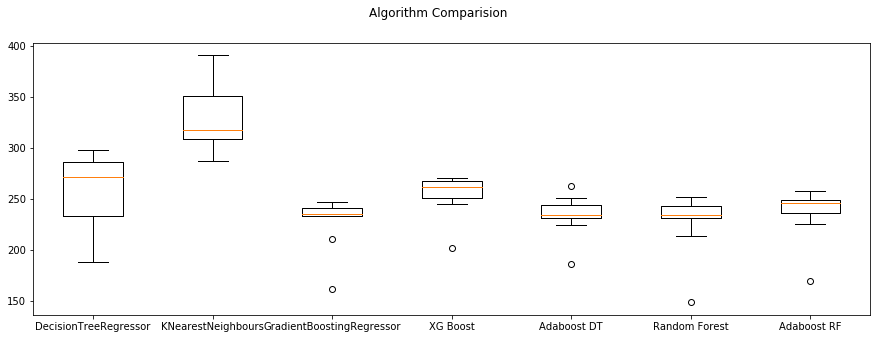

In [171]:
from sklearn import model_selection

models=[]
models.append(('DecisionTreeRegressor',DT))
models.append(('KNearestNeighbours',knn))
models.append(('GradientBoostingRegressor',GBR))
models.append(('XG Boost',xgbr))
models.append(('Adaboost DT',AB_DT))
models.append(('Random Forest',RF))
models.append(('Adaboost RF',AB_RF))
results=[]
names=[]
for name, model in models:
   
    cv_results = model_selection.cross_val_score(model, X2, y2, cv = 10, scoring = 'neg_mean_absolute_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s: %f (%f)' % (name, np.mean(np.sqrt(np.abs(cv_results))), np.var(np.sqrt(np.abs(cv_results)), ddof = 1)))
    
fig = plt.figure(figsize=(15,5))
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Summary

LR


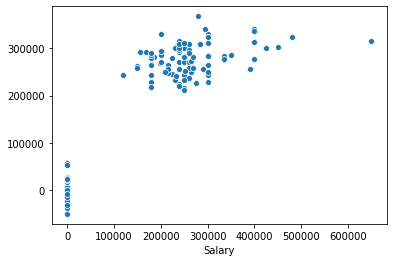

KNN


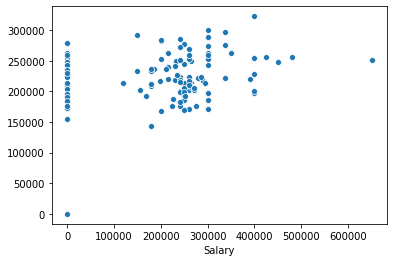

DT


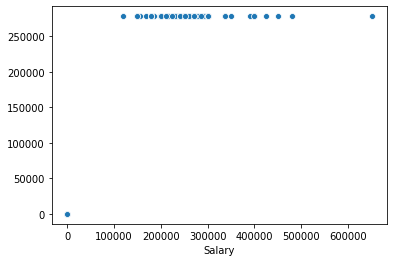

RF


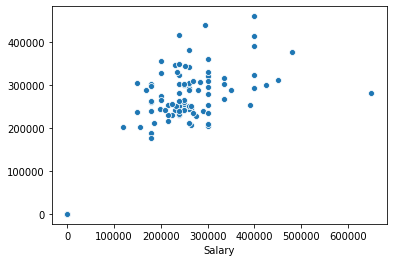

BR


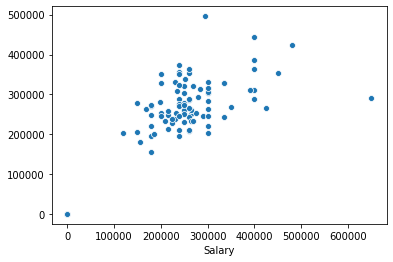

ABR


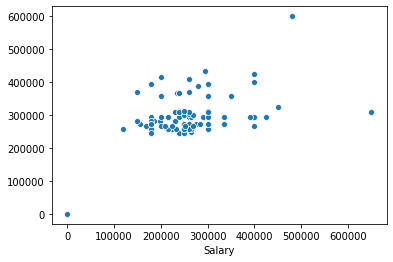

GBR


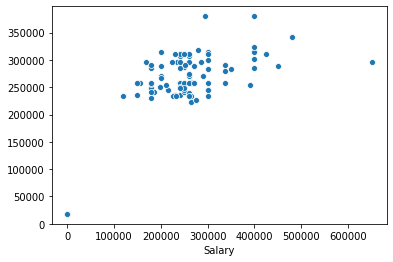

XGB


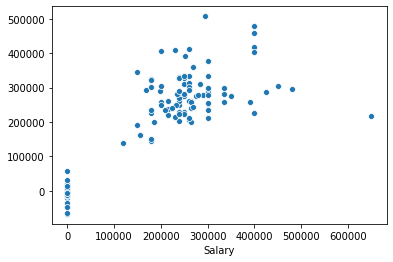

In [155]:
for name, i in model:
    i.fit(x2_tr, y2_tr)
    y_pred = i.predict(x2_te)
    print(name)
    sns.scatterplot(y2_te, y_pred)
    plt.show()

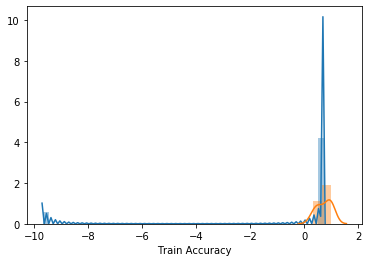

In [156]:
sns.distplot(results['Test Accuracy'])
sns.distplot(results['Train Accuracy'])
plt.show()

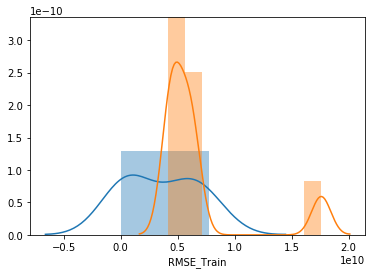

In [157]:
sns.distplot(results['RMSE_Test'])
sns.distplot(results['RMSE_Train'])
plt.show()